In [21]:
import numpy as np
import matplotlib.pyplot as plt

def draw_circle(image: np.ndarray, position: tuple, size_cm: float, color: tuple):
    """
    Draws a circle in a given RGB NumPy matrix.

    Parameters:
        image (np.ndarray): A 3D NumPy array (NxNx3) representing the RGB image.
        size_cm (float): Diameter of the circle in centimeters.
        color (tuple): A tuple (R, G, B) representing the color of the circle, with values in [0, 255].
        position (tuple): A tuple (x, y) specifying the circle's center in [-1, 1]² space.

    Returns:
        np.ndarray: The modified image with the circle drawn.
    """
    # Ensure the input image is valid
    if image.ndim != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a 3D NumPy array with shape (N, N, 3).")

    if not (0 <= color[0] <= 255 and 0 <= color[1] <= 255 and 0 <= color[2] <= 255):
        raise ValueError("Color values must be in the range [0, 255].")

    if not (-1 <= position[0] <= 1 and -1 <= position[1] <= 1):
        raise ValueError("Position coordinates must be in the range [-1, 1].")

    # Get image dimensions
    height, width, _ = image.shape

    # Map size in cm to size in pixels
    meters_per_pixel = 2 / height  # Since the image represents 2x2 meters
    radius_pixels = (size_cm / 100) / meters_per_pixel / 2

    # Map position from [-1, 1]² to pixel coordinates
    center_x = int((position[0] + 1) / 2 * width)
    center_y = int((position[1] + 1) / 2 * height)

    # Draw the circle
    y, x = np.ogrid[:height, :width]
    distance_from_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    mask = distance_from_center <= radius_pixels

    # Apply the color to the circle region
    image[mask] = color

def draw_agent(image: np.ndarray, position: tuple):
    size = 10
    color = (0, 0, 255)
    draw_circle(image, position, size, color)

def draw_prey(image: np.ndarray, position: tuple):
    size = 10
    color = (255, 0, 0)
    draw_circle(image, position, size, color)

def display_image(image: np.ndarray):
    """
    Displays the given image using Matplotlib.

    Parameters:
        image (np.ndarray): A 3D NumPy array (NxNx3) representing the RGB image.
    """
    plt.imshow(image)
    plt.axis("off")
    plt.show()

def observe_subarea(image: np.ndarray, position: tuple, n_pixel=5, view_size=0.5):
    """
    Observes a 5x5 pixelated subarea of the image centered around the given position.

    Parameters:
        image (np.ndarray): A 3D NumPy array (NxNx3) representing the RGB image.
        position (tuple): A tuple (x, y) specifying the center of the subarea in [-1, 1]² space.

    Returns:
        np.ndarray: A 5x5x3 NumPy array representing the pixelated subarea.
    """
    if not (-1 <= position[0] <= 1 and -1 <= position[1] <= 1):
        raise ValueError("Position coordinates must be in the range [-1, 1].")

    # Get image dimensions
    height, width, _ = image.shape

    # Map position from [-1, 1]² to pixel coordinates
    center_x = int((position[0] + 1) / 2 * width)
    center_y = int((position[1] + 1) / 2 * height)

    # Define the size of each pixel in the subarea in real pixels
    meters_per_pixel = 2 / height  # Since the image represents 2x2 meters

    pixel_size = int(view_size / n_pixel / meters_per_pixel)  # 10 cm in pixels

    # Initialize the 5x5x3 subarea array
    subarea = np.zeros((n_pixel, n_pixel, 3), dtype=np.uint8)

    # Calculate the subarea
    for i in range(-n_pixel // 2, n_pixel // 2 + 1):
        for j in range(-n_pixel // 2, n_pixel // 2 + 1):
            # Determine the bounds of the 10x10 cm square
            x_start = max(int(center_x + i * pixel_size - pixel_size / 2), 0)
            x_end = min(int(center_x + (i + 1) * pixel_size - pixel_size / 2), width)
            y_start = max(int(center_y + j * pixel_size - pixel_size / 2), 0)
            y_end = min(int(center_y + (j + 1) * pixel_size - pixel_size / 2), height)

            # Extract the subregion and calculate the average color
            subregion = image[y_start:y_end, x_start:x_end]
            if subregion.size > 0:
                subarea[j + n_pixel // 2, i + n_pixel // 2] \
                    = subregion.mean(axis=(0, 1)).astype(np.uint8)

    return subarea


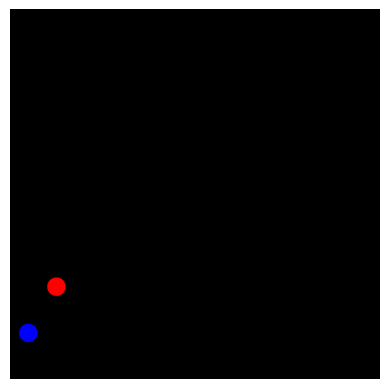

In [19]:
# Create an empty image (black background)
img_size = 1000  # 1000x1000 pixels
image = np.zeros((img_size, img_size, 3), dtype=np.uint8)

# Draw a red circle with a diameter of 50 cm at position (-0.5, 0.5)
red = (255, 0, 0)  # Red color
blue = (0, 0, 255)
circle_position = (-0.5, 0.5)

draw_prey(image, (-0.75, 0.5))
draw_agent(image, (-0.9, 0.75))

# Display the resulting image
display_image(image)

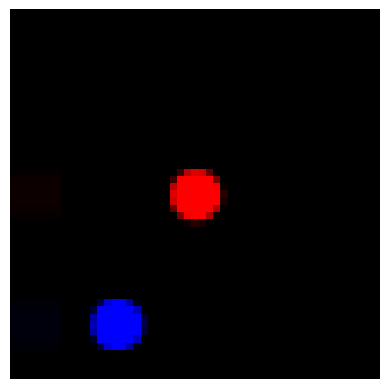

In [27]:
o = observe_subarea(image, (-0.75, 0.5), n_pixel=51, view_size=0.8)
display_image(o)

In [35]:
o / 255

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.36078431, 0.        , 0.        ],
        [0.41960784, 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.38039216],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.   

In [1]:
from PIL import ImageColor

AGENT_COLOR = ImageColor.getcolor('blue', mode='RGB')
AGENT_COLOR

(0, 0, 255)

In [1]:

from src.envs.mpe.environment import MultiAgentEnv
from src.envs.mpe_PredPrey_RGB.env import Scenario

# load scenario from script
scenario = Scenario()
# create world
scenario.make_world()
# create multiagent environment
env = MultiAgentEnv(scenario, discrete_action=True)

In [2]:
obs = env.reset()
env.render()

[None]

In [3]:
obs

[array([ 0.15034752, -0.33235838,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.25558904,  0.23948331,  0.        ,  0.        ,  1.        ,
         1.        ,  0.25361905,  0.90100505,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ]),
 array([0.85502893, 0.82075443, 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 0.        ]),
 array([ 0.25685545,  0.60516734,  0.        ,  1.        ,  1.        ,
         0.